In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install matplotlib==3.1.0


Note: you may need to restart the kernel to use updated packages.


In [3]:
sc = StandardScaler()

<h1>10 genres<h1/>

In [4]:
all_genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

In [5]:
training_data_df = pd.read_csv('../csv_files/Music_data_set_binary.csv').drop(['Unnamed: 0',], axis=1)

training_data_df[['mean_mfccs', 'mean_chroma_stft', 'tempo', 'pulse', 'contrast', 'zero_crossing']] = sc.fit_transform(training_data_df[['mean_mfccs', 'mean_chroma_stft', 'tempo', 'pulse', 'contrast', 'zero_crossing']])

In [6]:
training_data_df

,mean_mfccs,mean_chroma_stft,tempo,pulse,flatness,contrast,zero_crossing,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,0.498907,-0.350137,0.093269,1.249743,0.004498,0.001767,-0.493125,1,0,0,0,0,0,0,0,0,0
1,0.110828,-0.462482,-0.642775,1.103971,0.002298,0.070351,-1.138619,1,0,0,0,0,0,0,0,0,0
2,0.322963,-0.184224,1.933379,0.994767,0.002631,0.768619,-0.654318,1,0,0,0,0,0,0,0,0,0
3,0.135541,0.319639,2.448609,0.877943,0.000954,0.414641,-1.682014,1,0,0,0,0,0,0,0,0,0
4,-1.524946,-0.859077,0.713096,-0.323180,0.003238,0.433031,-0.053199,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.214062,-0.325957,-0.848867,0.200195,0.006552,1.129413,-0.345460,0,0,0,0,0,0,0,0,0,1
996,-0.221173,0.244975,-0.174383,0.122212,0.006468,0.985978,-0.142959,0,0,0,0,0,0,0,0,0,1
997,-0.396974,0.654637,0.387687,0.360191,0.007545,0.822079,0.434638,0,0,0,0,0,0,0,0,0,1
998,-0.314061,-0.198339,-0.418761,0.908199,0.001715,0.906024,-1.313485,0,0,0,0,0,0,0,0,0,1


In [7]:
y = training_data_df[['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']]
X = training_data_df.drop(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model = RandomForestClassifier(random_state=13)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
model.score(x_test, y_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.3

In [8]:
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[15,  0,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 9, 18,  0,  0,  0,  0,  0,  0,  0,  0],
       [15,  0,  2,  1,  0,  2,  0,  2,  0,  0],
       [14,  0,  0,  3,  0,  0,  1,  1,  0,  0],
       [15,  0,  0,  1,  5,  0,  0,  0,  0,  0],
       [16,  0,  0,  0,  0,  4,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0, 12,  0,  0,  0],
       [ 9,  0,  0,  1,  0,  0,  0,  7,  0,  0],
       [15,  0,  0,  0,  1,  1,  0,  0,  4,  0],
       [12,  0,  0,  1,  0,  0,  0,  0,  0,  2]])

Text(160.0, 0.5, 'Actual genres ')

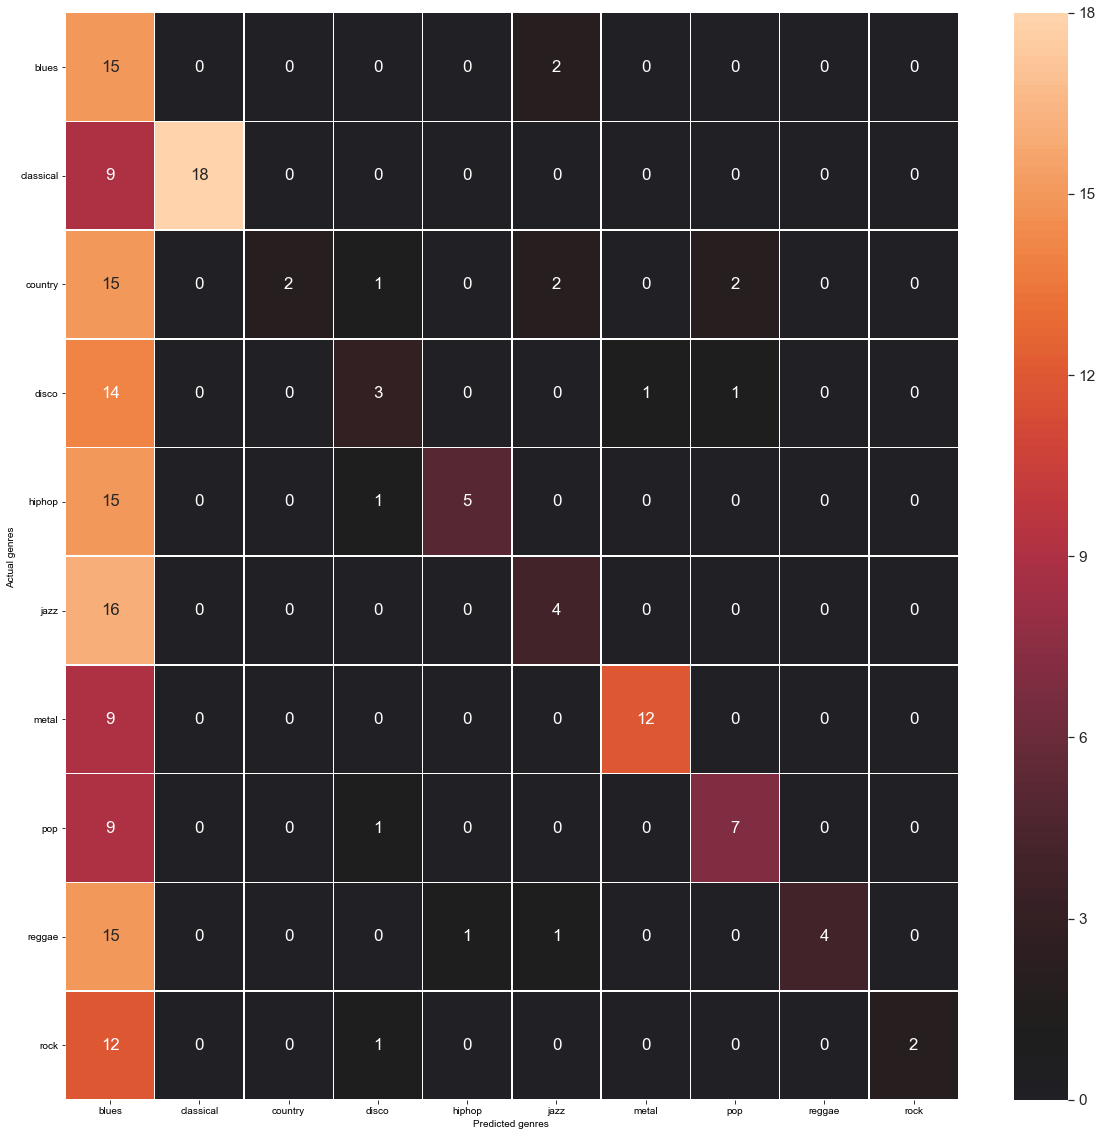

In [9]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, center=True)
ax.set_yticklabels(all_genres, rotation=0)
ax.set_xticklabels(all_genres)
plt.xlabel('Predicted genres ')
plt.ylabel('Actual genres ')

<h1>4 genres<h1/>

In [12]:
def data_set_select_genre_binary(df, selected_genres):
    data = df.copy()
    all_genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
    for genre in all_genres:
        if (genre not in selected_genres):
            data = data.drop(data[data[genre] == 1].index)
            data = data.drop([genre], axis = 1)
    return data

In [28]:
few_genres = ['blues', 'classical', 'metal', 'pop']

In [29]:
training_data_df = pd.read_csv('../csv_files/Music_data_set_binary.csv').drop(['Unnamed: 0'], axis=1)

training_data_2_genres_df = data_set_select_genre_binary(training_data_df, few_genres)

sc = StandardScaler()

training_data_2_genres_df[['mean_mfccs', 'mean_chroma_stft', 'tempo', 'pulse', 'contrast', 'zero_crossing']] = sc.fit_transform(training_data_2_genres_df[['mean_mfccs', 'mean_chroma_stft', 'tempo', 'pulse', 'contrast', 'zero_crossing']])
training_data_2_genres_df

,mean_mfccs,mean_chroma_stft,tempo,pulse,flatness,contrast,zero_crossing,blues,classical,metal,pop
0,0.501593,-0.214654,0.058430,1.423790,0.004498,-0.115005,-0.576237,1,0,0,0
1,0.198813,-0.311326,-0.698481,1.286785,0.002298,-0.047532,-1.166290,1,0,0,0
2,0.364322,-0.071886,1.950706,1.184148,0.002631,0.639436,-0.723586,1,0,0,0
3,0.218095,0.361688,2.480544,1.074349,0.000954,0.291187,-1.663013,1,0,0,0
4,-1.077418,-0.652596,0.695828,-0.054539,0.003238,0.309280,-0.174097,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
795,0.861547,-0.048221,-0.910416,0.795346,0.037135,-0.921487,-0.065597,0,0,0,1
796,1.099464,-0.322016,-1.455392,0.919540,0.037984,-0.375578,-0.089902,0,0,0,1
797,0.506041,1.016942,-1.106048,1.233413,0.063447,-1.467287,0.605945,0,0,0,1
798,0.763106,0.308399,-0.216811,0.715287,0.099239,-1.257653,1.607603,0,0,0,1


In [30]:
y = training_data_2_genres_df[few_genres]
X = training_data_2_genres_df.drop(few_genres, axis=1)

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state=42)

model = RandomForestClassifier(random_state=13)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
model.score(x_test, y_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9125

In [31]:
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[23,  2,  1,  0],
       [ 0, 17,  0,  1],
       [ 1,  0, 16,  1],
       [ 0,  0,  0, 18]])

Text(152.5, 0.5, 'Actual genres ')

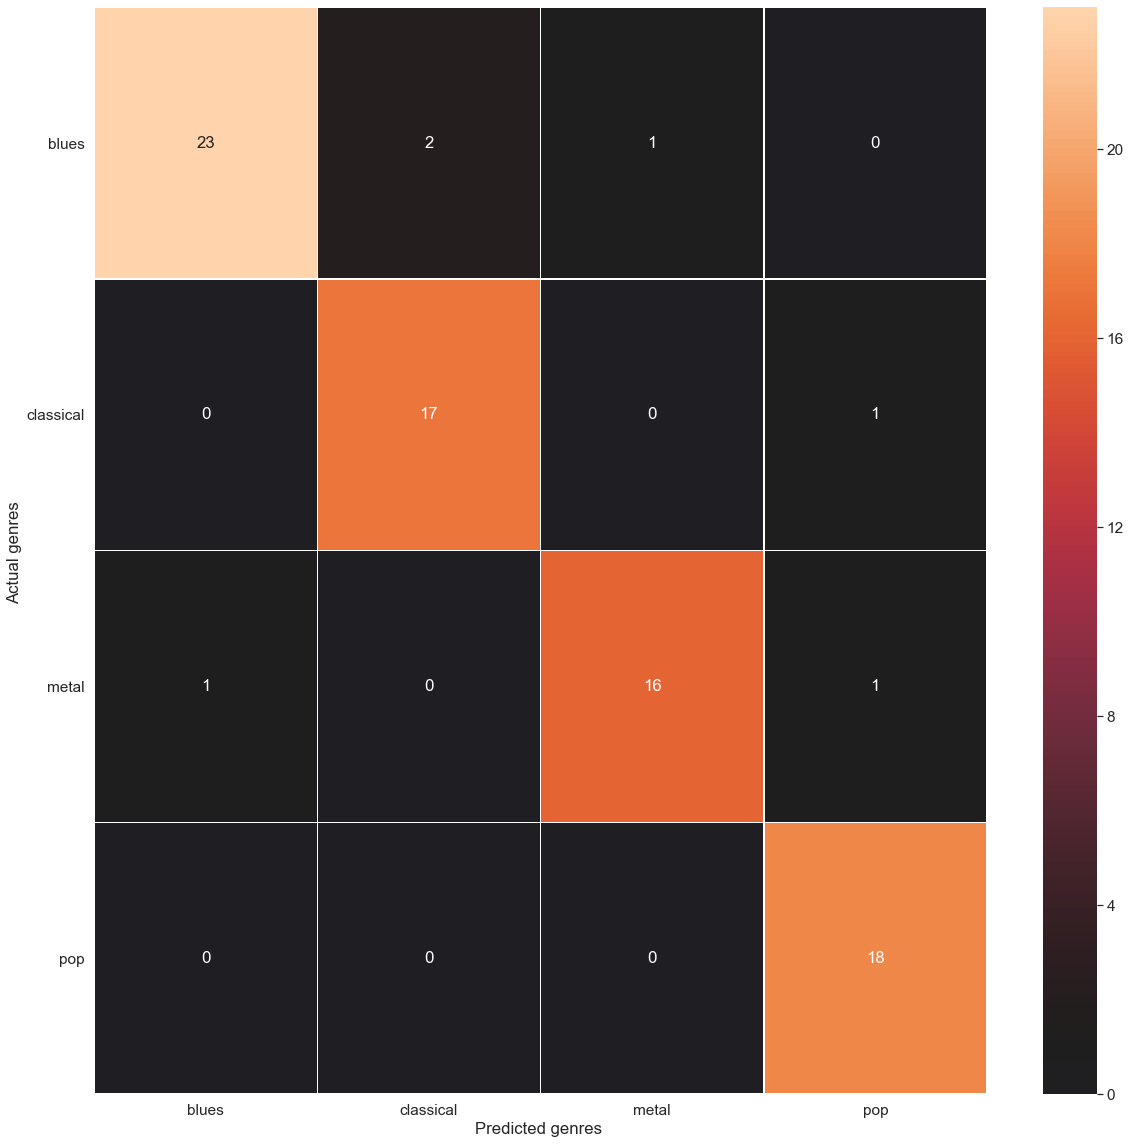

In [32]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, center=True)
ax.set_yticklabels(few_genres, rotation=0)
ax.set_xticklabels(few_genres)
plt.xlabel('Predicted genres ')
plt.ylabel('Actual genres ')
